<a href="https://colab.research.google.com/github/kurokawa5/ML4DS/blob/main/03_classification_part1/03_classification_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Task 1: K - Nearest Neighbours

#### Task 1.1: Import and load the data:

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import numpy as np
%matplotlib inline
import pylab as plt
from matplotlib.colors import ListedColormap

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])


In [11]:
data = np.loadtxt('/content/drive/MyDrive/05_workspace/09_ml4ds/03_classification_part1/orange_lemon.txt', delimiter=',') # load fruit data
data

array([[ 0. ,  6.2,  4.7],
       [ 0. ,  6. ,  4.6],
       [ 0. ,  5.8,  4.3],
       [ 0. ,  5.9,  4.3],
       [ 0. ,  5.8,  4. ],
       [ 0. ,  9. ,  9.4],
       [ 0. ,  9.2,  9.2],
       [ 0. ,  9.6,  9.2],
       [ 0. ,  7.5,  9.2],
       [ 0. ,  6.7,  7.1],
       [ 0. ,  7. ,  7.4],
       [ 0. ,  7.1,  7.5],
       [ 0. ,  7.8,  8. ],
       [ 0. ,  7.2,  7. ],
       [ 0. ,  7.5,  8.1],
       [ 0. ,  7.6,  7.8],
       [ 0. ,  7.1,  7.9],
       [ 0. ,  7.1,  7.6],
       [ 0. ,  7.3,  7.3],
       [ 0. ,  7.2,  7.8],
       [ 0. ,  6.8,  7.4],
       [ 0. ,  7.1,  7.5],
       [ 0. ,  7.6,  8.2],
       [ 0. ,  7.2,  7.2],
       [ 1. ,  7.2, 10.3],
       [ 1. ,  7.3, 10.5],
       [ 1. ,  7.2,  9.2],
       [ 1. ,  7.3, 10.2],
       [ 1. ,  7.3,  9.7],
       [ 1. ,  7.3, 10.1],
       [ 1. ,  5.8,  8.7],
       [ 1. ,  6. ,  8.2],
       [ 1. ,  6. ,  7.5],
       [ 1. ,  5.9,  8. ],
       [ 1. ,  6. ,  8.4],
       [ 1. ,  6.1,  8.5],
       [ 1. ,  6.3,  7.7],
 

In [22]:
data.shape

(40, 3)

Text(0, 0.5, 'Height')

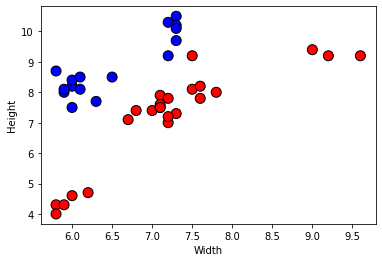

In [23]:
X = data[:,1:3]
t = data[:,0]
plt.scatter(X[:, 0], X[:, 1], c=t, cmap=cmap_bold, edgecolor='k', s=100)
plt.xlabel('Width')
plt.ylabel('Height')

#### Task 1.2: Use K-NN to classify orange and lemon data.

In [21]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
h = .02
# 領域の最大最小値
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
xx.shape

(425, 290)

In [27]:
X[:, 0].min() - 1



4.8

In [26]:
np.arange(x_min, x_max, h)

array([ 4.8 ,  4.82,  4.84,  4.86,  4.88,  4.9 ,  4.92,  4.94,  4.96,
        4.98,  5.  ,  5.02,  5.04,  5.06,  5.08,  5.1 ,  5.12,  5.14,
        5.16,  5.18,  5.2 ,  5.22,  5.24,  5.26,  5.28,  5.3 ,  5.32,
        5.34,  5.36,  5.38,  5.4 ,  5.42,  5.44,  5.46,  5.48,  5.5 ,
        5.52,  5.54,  5.56,  5.58,  5.6 ,  5.62,  5.64,  5.66,  5.68,
        5.7 ,  5.72,  5.74,  5.76,  5.78,  5.8 ,  5.82,  5.84,  5.86,
        5.88,  5.9 ,  5.92,  5.94,  5.96,  5.98,  6.  ,  6.02,  6.04,
        6.06,  6.08,  6.1 ,  6.12,  6.14,  6.16,  6.18,  6.2 ,  6.22,
        6.24,  6.26,  6.28,  6.3 ,  6.32,  6.34,  6.36,  6.38,  6.4 ,
        6.42,  6.44,  6.46,  6.48,  6.5 ,  6.52,  6.54,  6.56,  6.58,
        6.6 ,  6.62,  6.64,  6.66,  6.68,  6.7 ,  6.72,  6.74,  6.76,
        6.78,  6.8 ,  6.82,  6.84,  6.86,  6.88,  6.9 ,  6.92,  6.94,
        6.96,  6.98,  7.  ,  7.02,  7.04,  7.06,  7.08,  7.1 ,  7.12,
        7.14,  7.16,  7.18,  7.2 ,  7.22,  7.24,  7.26,  7.28,  7.3 ,
        7.32,  7.34,

Text(0.5, 1.0, 'KNN (k = 11)')

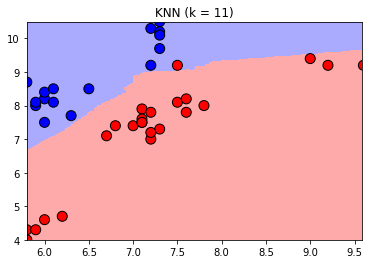

In [19]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

n_neighbors = 11
clf = KNeighborsClassifier(n_neighbors)
clf.fit(X, t)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=t, cmap=cmap_bold,
            edgecolor='k', s=100)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("KNN (k = %i)"
          % (n_neighbors))

In [ ]:
cv_scores = []
for i in range(1,30,1):
    knn_cv = KNeighborsClassifier(n_neighbors=i)
    cv_scores.append(1-np.mean(cross_val_score(knn_cv, X, t, cv=5)))
    
plt.plot(np.arange(1,30,1),cv_scores)
plt.xlabel('Number of neighbors')
plt.ylabel('Average CV error')
print(np.min(cv_scores))

In [ ]:
n_neighbors = 40
clf = KNeighborsClassifier(n_neighbors)
clf.fit(X, t)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=t, cmap=cmap_bold,
            edgecolor='k', s=100)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("KNN (k = %i)"
          % (n_neighbors))

In [ ]:
n_neighbors = 40
clf = KNeighborsClassifier(n_neighbors, weights="distance")
clf.fit(X, t)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=t, cmap=cmap_bold,
            edgecolor='k', s=100)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("KNN (k = %i)" % (n_neighbors))